# Анализ факторов, влияющих на успешность игры: выявление закономерностей


# Описание проекта
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Мы планируете кампанию на 2017-й.


# План работы
1. Загрузка и подготовка данных
2. EDA
3. Составление портрета пользователя каждого региона
4. Проверка гипотез
5. Вывод

# Описание данных:

- **Name**: название игры
- **Platform**: платформа
- **Year_of_Release**: год выпуска
- **Genre**: жанр игры
- **NA_sales**: продажи в Северной Америке (миллионы проданных копий)
- **EU_sales**: продажи в Европе (миллионы проданных копий)
- **JP_sales**: продажи в Японии (миллионы проданных копий)
- **Other_sales**: продажи в других странах (миллионы проданных копий)
- **Critic_Score**: оценка критиков (максимум 100)
- **User_Score**: оценка пользователей (максимум 10)
- **Rating**: рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


# 1. Загрузка и подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
df = pd.read_csv('/datasets/games.csv')

Подготовим данные

In [ ]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приведем название столбцов к нижнему регистру

In [ ]:
df. rename(columns = {'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre',
                      'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales',
                      'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'}, inplace = True )

In [ ]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

преобразуем год релиза игры и оценку критиков в целые значения

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [ ]:
df['critic_score'] = df['critic_score'].astype('Int64')

In [ ]:
df.isna().mean().sort_values(ascending=False)

critic_score       0.513192
rating             0.404786
user_score         0.400897
year_of_release    0.016093
name               0.000120
genre              0.000120
platform           0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
dtype: float64

Большинство пропусков в столбцах critic_score, rating,user_score и year_of_release. Пропуски в столбцах с рейтингами оставим т.к. их там много и это сильно исказить исходную информаци, заменим пропуски в столбце год релиза медианным значением . Столбцы name и genre не будем трогать пропуски там минимальные.
Причинами пропусков мог быть человеческий фактор или техническая ошибка.


In [ ]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [ ]:
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].median()) # заменим пропуски в столбце год релиза медианным значением

To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется
Создадим отдельный столбец tdb

In [ ]:
df['tbd'] = df['year_of_release'] # Создадим отдельный столбец tdb

In [ ]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales'] # Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец total_sales

In [ ]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,2006,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,1985,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,2008,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,2009,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,1996,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,2016,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,2006,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,2016,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,2003,0.01


# 2. EDA

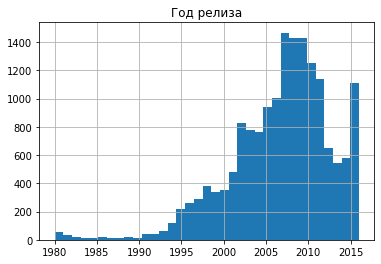

In [ ]:
fig, ax = plt.subplots()
ax.hist(df['year_of_release'], bins = 35, rwidth = 1)
ax.set_title('Год релиза').axes.grid()
plt.show()

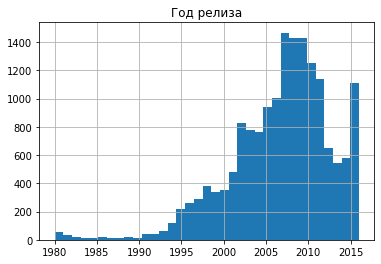

In [ ]:
plt.hist(df['year_of_release'], bins = 35, rwidth = 1)
plt.title('Год релиза').axes.grid()
plt.show()

основным периодом релиза игр был 1995-2015 гг. Выпускалось от 200 до 1400 игр в год. Данные важны за все периоды т.к. год релиза может значительно отличаться от года выхода игры в продажу

<AxesSubplot:xlabel='platform'>

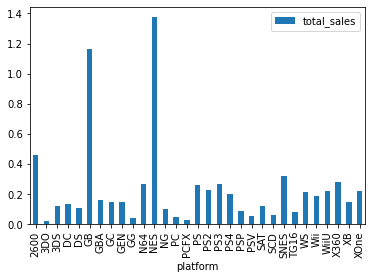

In [ ]:
df.pivot_table(index='platform',values='total_sales',aggfunc='median').plot.bar()

<AxesSubplot:xlabel='year_of_release'>

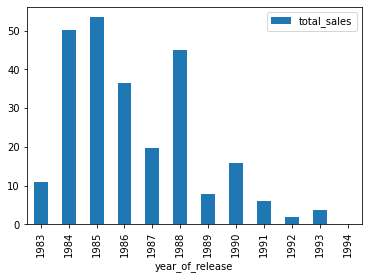

In [ ]:
df.query('platform == "NES"').pivot_table(index = 'year_of_release', values = 'total_sales',aggfunc = 'sum').plot.bar()

<AxesSubplot:xlabel='year_of_release'>

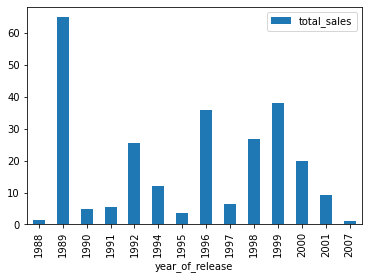

In [ ]:
df.query('platform == "GB"').pivot_table(index = 'year_of_release', values = 'total_sales',aggfunc = 'sum').plot.bar()

<AxesSubplot:xlabel='year_of_release'>

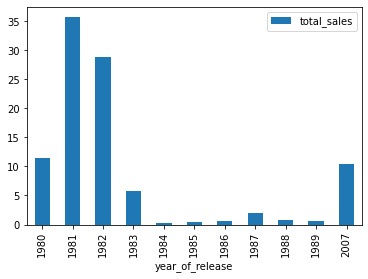

In [ ]:
df.query('platform == "2600"').pivot_table(index = 'year_of_release', values = 'total_sales',aggfunc = 'sum').plot.bar()

<AxesSubplot:xlabel='year_of_release'>

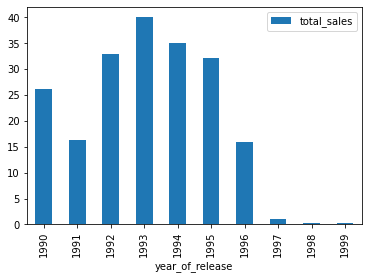

In [ ]:
df.query('platform == "SNES"').pivot_table(index = 'year_of_release', values = 'total_sales',aggfunc = 'sum').plot.bar()

<AxesSubplot:xlabel='year_of_release'>

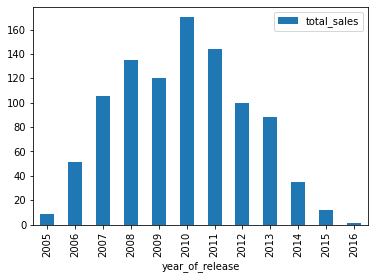

In [ ]:
 df.query('platform == "X360"').pivot_table(index = 'year_of_release', values = 'total_sales',aggfunc = 'sum').plot.bar()

<AxesSubplot:xlabel='year_of_release'>

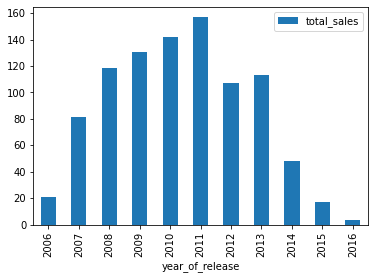

In [ ]:
df.query('platform == "PS3"').pivot_table(index = 'year_of_release', values = 'total_sales',aggfunc = 'sum').plot.bar()

<AxesSubplot:xlabel='year_of_release'>

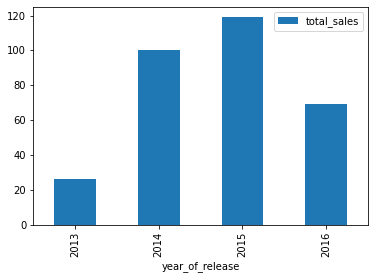

In [ ]:
df.query('platform == "PS4"').pivot_table(index = 'year_of_release', values = 'total_sales',aggfunc = 'sum').plot.bar()

<AxesSubplot:xlabel='year_of_release'>

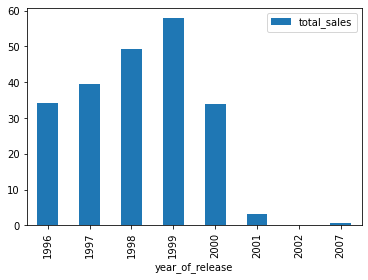

In [ ]:
df.query('platform == "N64"').pivot_table(index = 'year_of_release', values = 'total_sales',aggfunc = 'sum').plot.bar()

<AxesSubplot:xlabel='year_of_release'>

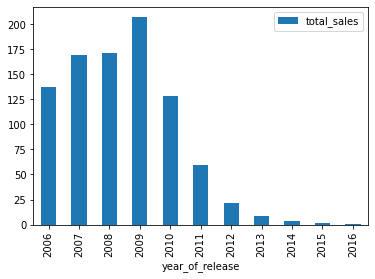

In [ ]:
df.query('platform == "Wii"').pivot_table(index = 'year_of_release', values = 'total_sales',aggfunc = 'sum').plot.bar()

характерный срок появления новых и исчезновение старых платформ 5 лет

<Figure size 1440x576 with 0 Axes>

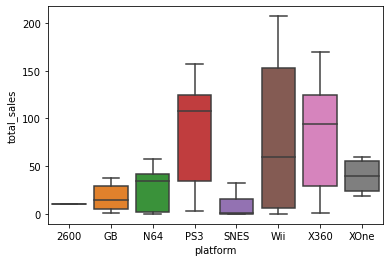

<Figure size 1440x576 with 0 Axes>

In [ ]:
top_platform = df[df['year_of_release'] >= 1995]
top_platform = top_platform.pivot_table(index = ['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()
popular_platforms = top_platform[top_platform['platform'].isin(['PS3','XOne','Wii','N64','X360','SNES','2600','GB'])]
sns.boxplot(x='platform', y='total_sales', data=popular_platforms)
plt.figure(figsize=(20,8))


исключим не репризентативные платформы '2600','SNES','2600','GB','NES'

<Figure size 1440x576 with 0 Axes>

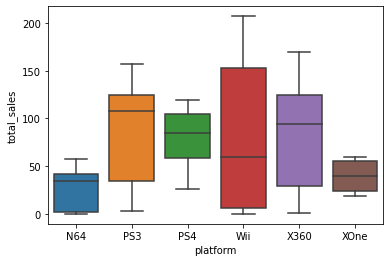

<Figure size 1440x576 with 0 Axes>

In [ ]:
top_platform = df[df['year_of_release'] >= 1995]
top_platform = top_platform.pivot_table(index = ['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()
popular_platforms = top_platform[top_platform['platform'].isin(['PS4','PS3','Wii','XOne','N64','X360'])]
sns.boxplot(x='platform', y='total_sales', data=popular_platforms)
plt.figure(figsize=(20,8))

исключим старые платформы N64 и Wii

<Figure size 1440x576 with 0 Axes>

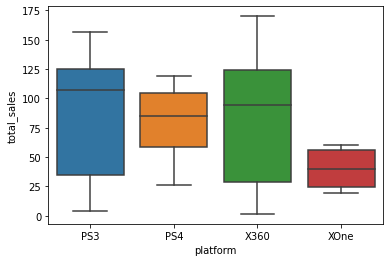

<Figure size 1440x576 with 0 Axes>

In [ ]:
top_platform = df[df['year_of_release'] >= 1995]
top_platform = top_platform.pivot_table(index = ['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()
popular_platforms = top_platform[top_platform['platform'].isin(['PS4','PS3','XOne','X360'])]
sns.boxplot(x='platform', y='total_sales', data=popular_platforms)
plt.figure(figsize=(20,8))

выявлены очевидные два лидера рынка PS и Xbox у каждого лидера по две успешные платформы PS имеет преимущество в продажах и скорее всего и будет лучше продавться в 2017 году

In [ ]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,2006,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,1985,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,2008,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,2009,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,1996,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,2016,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,2006,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,2016,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,2003,0.01


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

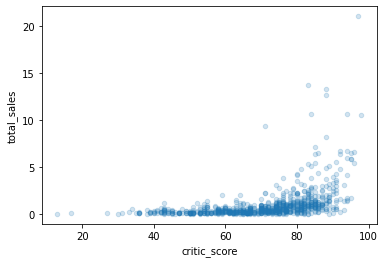

In [ ]:
df[df['platform'] == 'PS3'].plot(x='critic_score', y='total_sales',kind='scatter',alpha=0.2)

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

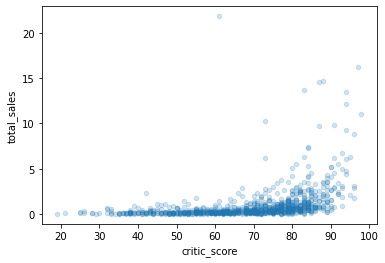

In [ ]:
df[df['platform'] == 'X360'].plot(x='critic_score', y='total_sales',kind='scatter',alpha=0.2)

у обеих платформ продажи начинают расти незначительно при рейтинге 80-90

In [ ]:
! pip install phik

     |████████████████████████████████| 679 kB 2.1 MB/s eta 0:00:01


In [ ]:
import phik
import seaborn as sns
from phik import resources, report
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'tbd', 'total_sales']


/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 11559. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


In [ ]:
phik_overview

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
name,1.000000,0.957163,0.993875,1.000000,0.830554,0.928835,0.987451,0.000000,0.961222,0.000000,0.957529,0.993875,0.941709
platform,0.957163,1.000000,0.921048,0.476020,0.173877,0.052636,0.320949,0.000000,0.227091,0.513659,0.417676,0.921048,0.116944
year_of_release,0.993875,0.921048,1.000000,0.257060,0.190036,0.019186,0.241579,0.000000,0.150719,0.499121,0.268711,1.000000,0.135986
genre,1.000000,0.476020,0.257060,1.000000,0.068236,0.029753,0.104624,0.027437,0.150677,0.358285,0.556189,0.257060,0.059220
na_sales,0.830554,0.173877,0.190036,0.068236,1.000000,0.780982,0.639363,0.658901,0.221487,0.000000,0.061790,0.190036,0.898960
eu_sales,0.928835,0.052636,0.019186,0.029753,0.780982,1.000000,0.603556,0.914418,0.106559,0.000000,0.016361,0.019186,0.959137
jp_sales,0.987451,0.320949,0.241579,0.104624,0.639363,0.603556,1.000000,0.340355,0.093951,0.000000,0.046706,0.241579,0.693919
other_sales,0.000000,0.000000,0.000000,0.027437,0.658901,0.914418,0.340355,1.000000,0.110261,0.000000,0.036575,0.000000,0.874725
critic_score,0.961222,0.227091,0.150719,0.150677,0.221487,0.106559,0.093951,0.110261,1.000000,0.700549,0.128702,0.150719,0.139999
user_score,0.000000,0.513659,0.499121,0.358285,0.000000,0.000000,0.000000,0.000000,0.700549,1.000000,0.347258,0.499121,0.067547


<AxesSubplot:>

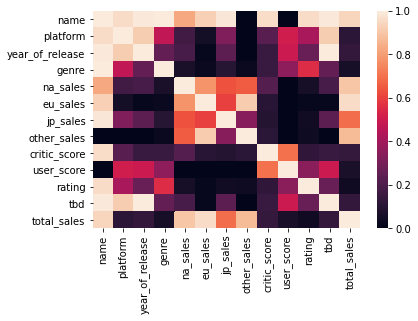

In [ ]:
sns.heatmap(phik_overview)

In [ ]:
phik_overview['total_sales'].sort_values(ascending=False)

total_sales        1.000000
eu_sales           0.959137
name               0.941709
na_sales           0.898960
other_sales        0.874725
jp_sales           0.693919
critic_score       0.139999
year_of_release    0.135986
tbd                0.135986
platform           0.116944
user_score         0.067547
genre              0.059220
rating             0.041255
Name: total_sales, dtype: float64

небольшая корреляция продаж от critic_score и совсем отсутвует корреляция от rating

<AxesSubplot:>

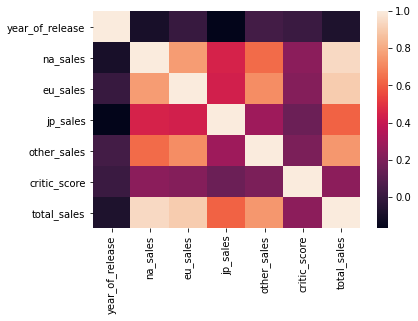

In [ ]:
sns. heatmap(df[ ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
                  'critic_score', 'user_score', 'rating', 'total_sales']].corr())

небольшая корреляция продаж от critic_score и совсем отсутвует корреляция от rating

<AxesSubplot:xlabel='genre'>

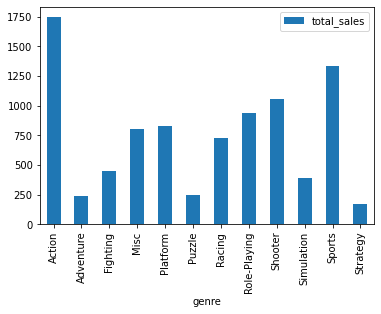

In [ ]:
df.pivot_table(index = 'genre', values = 'total_sales',aggfunc = 'sum').plot.bar()

Выделяются жанры с высокими продажами экшн и спорт, жанры с низкими продажами пазлы и стратегии

# 3. Составление портрета пользователя каждого региона

In [ ]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,2006,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,1985,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,2008,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,2009,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,1996,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,2016,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,2006,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,2016,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,2003,0.01


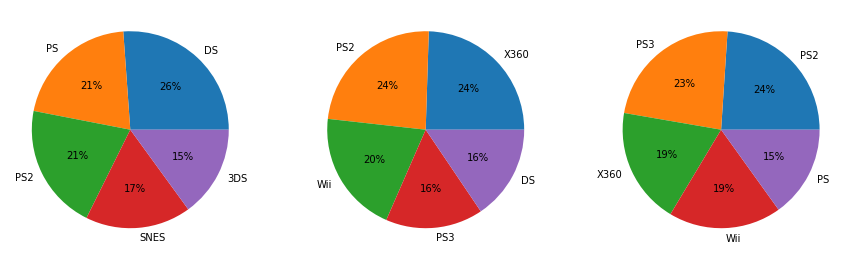

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

top5_platform_jp = (df.pivot_table(index='platform', values=['jp_sales', 'total_sales'], aggfunc='sum')
                    .sort_values(by='jp_sales', ascending=False).head(5))
axs[0].pie(top5_platform_jp['jp_sales'], labels = top5_platform_jp.index, autopct='%.0f%%');

top5_platform_na = (df.pivot_table(index='platform', values=['na_sales', 'total_sales'], aggfunc='sum')
                    .sort_values(by='na_sales', ascending=False).head(5))
axs[1].pie(top5_platform_na['na_sales'], labels = top5_platform_na.index, autopct='%.0f%%');

top5_platform_eu = (df.pivot_table(index='platform', values=['eu_sales', 'total_sales'], aggfunc='sum')
                    .sort_values(by='eu_sales', ascending=False).head(5))
axs[2].pie(top5_platform_eu['eu_sales'], labels = top5_platform_eu.index, autopct='%.0f%%');

Продажи игровых платформ в Европе и Северной Америке имеют схоже пропорции с небольшой разницей в Европе подавляюще преобладают платформы PS а в Америке 16% занимает DS. в Японии не продаётся X360 и PS3, вместо них продается 3DS и SNES.

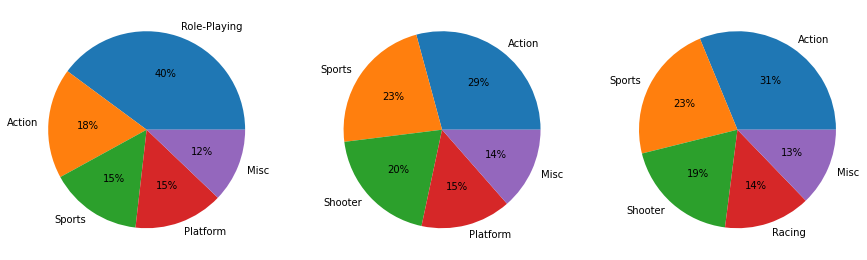

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

top5_platform_jp = (df.pivot_table(index='genre', values=['jp_sales', 'total_sales'], aggfunc='sum')
                    .sort_values(by='jp_sales', ascending=False).head(5))
axs[0].pie(top5_platform_jp['jp_sales'], labels = top5_platform_jp.index, autopct='%.0f%%');

top5_platform_na = (df.pivot_table(index='genre', values=['na_sales', 'total_sales'], aggfunc='sum')
                    .sort_values(by='na_sales', ascending=False).head(5))
axs[1].pie(top5_platform_na['na_sales'], labels = top5_platform_na.index, autopct='%.0f%%');

top5_platform_eu = (df.pivot_table(index='genre', values=['eu_sales', 'total_sales'], aggfunc='sum')
                    .sort_values(by='eu_sales', ascending=False).head(5))
axs[2].pie(top5_platform_eu['eu_sales'], labels = top5_platform_eu.index, autopct='%.0f%%');

По жанрам тоже наблюдается схожесть Америки и Европы с преобладанием жанров экш, спорт и шутеры. В Японии преобладает Computer Role-Playing Game (компьютерные ролевые игры).

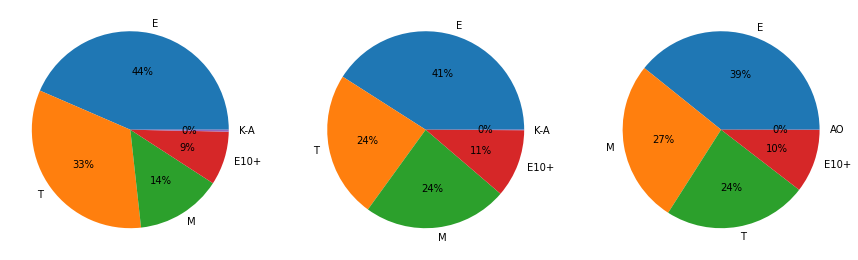

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

top5_platform_jp = (df.pivot_table(index='rating', values=['jp_sales', 'total_sales'], aggfunc='sum')
                    .sort_values(by='jp_sales', ascending=False).head(5))
axs[0].pie(top5_platform_jp['jp_sales'], labels = top5_platform_jp.index, autopct='%.0f%%');

top5_platform_na = (df.pivot_table(index='rating', values=['na_sales', 'total_sales'], aggfunc='sum')
                    .sort_values(by='na_sales', ascending=False).head(5))
axs[1].pie(top5_platform_na['na_sales'], labels = top5_platform_na.index, autopct='%.0f%%');

top5_platform_eu = (df.pivot_table(index='rating', values=['eu_sales', 'total_sales'], aggfunc='sum')
                    .sort_values(by='eu_sales', ascending=False).head(5))
axs[2].pie(top5_platform_eu['eu_sales'], labels = top5_platform_eu.index, autopct='%.0f%%');

в рейтинге преобладает «E» («Everyone») — «Для всех», «T» («Teen») — «Подросткам», «M» («Mature») — «Для взрослых» примерно в равных пропорциях

#4.  Проверка гипотез

In [ ]:
from scipy import stats as st

In [ ]:
df_for_criter = df[df['user_score'] != 'tbd']

In [ ]:
df_for_criter = df_for_criter[df_for_criter['user_score'].notnull()] # отбросим tbd и Nan

In [ ]:
df_for_criter['user_score'] = df_for_criter['user_score'].astype(float) # переведем столбец из объекта во float  для последующих расчетов

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные


In [ ]:
df_xone = df_for_criter[(df_for_criter['platform'] == 'XOne') & (df_for_criter['user_score'] > 0)]['user_score']
df_pc = df_for_criter[(df_for_criter['platform'] == 'PC') & (df_for_criter['user_score'] > 0)]['user_score']

alpha = 0.05 # alpha = задайте значение уровня значимости
results = st.ttest_ind(df_xone, df_pc)
 # results = вызов метода для проверки гипотезы

print('значения p-value:',results.pvalue) # вывод значения p-value на экран
if results.pvalue < alpha: # условный оператор с выводом строки с ответом
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

значения p-value: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


значения p-value: 1.3896435533548819e-05 Отвергаем нулевую гипотезу значит средние пользовательские рейтинги платформ Xbox One и PC разные

H0: Средние пользовательские рейтинги жанров Actions и  Sports одинаковые

H1: Средние пользовательские рейтинги платформ Actions и  Sports разные


In [ ]:
df_action = df_for_criter[(df_for_criter['genre'] == 'Actions') & (df_for_criter['user_score'] > 0)]['user_score']
df_sport = df_for_criter[(df_for_criter['genre'] == 'Sports') & (df_for_criter['user_score'] > 0)]['user_score']

alpha = 0.05 # alpha = задайте значение уровня значимости
results = st.ttest_ind(df_xone, df_pc)
 # results = вызов метода для проверки гипотезы

print('значения p-value:',results.pvalue) # вывод значения p-value на экран
if results.pvalue < alpha: # условный оператор с выводом строки с ответом
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

значения p-value: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


значения p-value: 1.3896435533548819e-05 отвергаем нулевую гипотез значит средние пользовательские рейтинги платформ Actions и  Sports разные

 # 5.Вывод
  Основным периодом релиза игр был 1995-2015 гг. Выпускалось от 200 до 1400 игр в год. Характерный срок появления новых и исчезновение старых платформ 5 лет.

  Выявлены очевидные два лидера рынка PS и Xbox у каждого лидера по две успешные платформы, PS имеет преимущество в продажах и скорее всего и будет лучше продавться в 2017 году. У обеих платформ продажи начинают расти незначительно при рейтинге 80-90. Небольшая корреляция продаж от critic_score и совсем отсутвует корреляция от rating. Выделяются жанры с высокими продажами экшн и спорт, жанры с низкими продажами пазлы и стратегии.

  Продажи игровых платформ в Европе и Северной Америке имеют схоже пропорции с небольшой разницей в Европе подавляюще преобладают платформы PS а в Америке 16% занимает DS. в Японии не продаётся X360 и PS3, вместо них продается 3DS и SNES.
По жанрам тоже наблюдается схожесть Америки и Европы с преобладанием жанров экш, спорт и шутеры. В Японии преобладает Computer Role-Playing Game (компьютерные ролевые игры). В рейтинге преобладает «E» («Everyone») — «Для всех», «T» («Teen») — «Подросткам», «M» («Mature») — «Для взрослых» примерно в равных пропорциях

В результате проверки гипотез выяснили:
средние пользовательские рейтинги платформ Xbox One и PC разные и средние пользовательские рейтинги платформ Actions и  Sports разные